<a href="https://colab.research.google.com/github/Andrea-24744/Simulaci-n-1/blob/main/CITAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Metodología de la Simulación
***Santelices Medina Andrea***

#Problema 10 por simulación
***Andrea Santelices Medina***


<p style="text-align: justify;">Dos personas han quedado citas en un determinado lugar. Ambas tienen la misma probabilidad de llegar al lugar de la cita en el intervalo de tiempo [0, 30] (minutos).Determínese la probabilidad de que el tiempo que una persona espere a la otra sea
como máximo 10 minutos.</p>

* Resuelva el problema analíticamente.

*  Describa los pasos para resolverlo por simulación, utilizando la metodología pro-
puesta en el curso.

**PASO 1**. Defina las variables que intervienen en el modelo.

* $x_1$ = Minuto en el que llega la persona A
* $x_2$ = Minuto en el que llega la persona B


$$x_1 \sim U(0,30)$$

$$x_2 \sim U(0,30)$$

**PASO 2**. Formule la distribución de probabilidad de cada variable.

$$x_1 \sim f(x_1)=\frac{1}{b -a} = \frac{1}{30}$$

$$x_2 \sim f(x_2)=\frac{1}{b -a} = \frac{1}{30}$$

**PASO 3**. Modele las variables aleatorias

*Modelaremos directamente por random uniform*

1. Generar $U_1, U_2  \sim U(0,1)$

In [200]:
import random

x_1 = random.uniform(0, 30)
x_2 = random.uniform(0, 30)

**PASO 4**. Defina el modelo del sistema y los objetivos de la simulación

<p style="text-align: justify;">Queremos determinar la probabilidad de que el tiempo que una persona espere a la otra sea como máximo 10 minutos:</p>

$i.e \quad$ ***condición de tolerancia:***

$$|x_2 - x_1| \leq 10$$

$\therefore \quad $***Buscamos*** $\quad P(-10 \leq x_2 - x_1\leq 10)$

**PASO 5**. Genere números aleatorios.

In [201]:
import numpy as np
import random
# Simplemente generamos 2 numeros aleatorios, tal que si cumplen una condición
# los va sumando para al final dividirlo entre todos los generados
def exp(n):
    s=0
    for _  in range(n):
        x_1=random.uniform(0,30)
        x_2=random.uniform(0,30)
        if abs(x_2 -x_1) <= 10:
            s+=1
    prob=s/n
    return prob


**PASO 6**. Repetir M veces el experimento

In [202]:
def muestra(m):       # Repeticiones, es decir, las veces que vamos a repetir nuestro experimento agrando todas en una lista
    l=[]                # para englobar una replica de la modelacion y posteriormente ver su convergencia
    for i in range(m):
        d =exp(i+1)
        l.append(d)
    return l


**PASO 7**. Obtenga la gráfica de estabilización que indica que el tamaño de muestra utilizado es suficiente para
garantizar la convergencia del resultado.

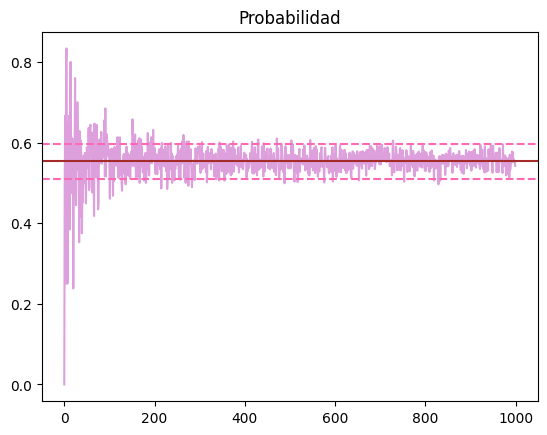

In [203]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
n = 10
m = 1000
A = muestra(m)

# Generamos nuestra grafica para visualizar hasta que punto se estabilizan las fluctuaciones
plt.plot(A, color="plum")
plt.title('Probabilidad')
plt.axhline(y=np.mean(A), color='brown', label="media:")
plt.axhline(y=np.mean(A)+np.std(A),color='hotpink', linestyle='--', label="Varianza")
plt.axhline(y=np.mean(A)-np.std(A), color='hotpink', linestyle='--')
plt.show()

**PASO 8**. Replique el modelo.

In [204]:
def simulacion_m(r):    # de las repeticiones hechas en la muestra para nuestro experimento, guardaremos ahora sus medias
    L = []                  # para estimar el valor esperado
    for i in range(r):
        L.append(np.mean(exp(1000)))
    return L

In [205]:
simulacion = simulacion_m(800) #Establecemos una n lo suficientemente grande para ver su comportamiento en el histograma

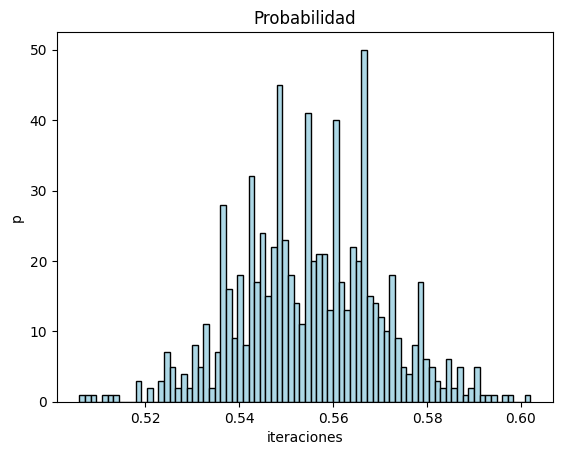

In [206]:
# Generamos histograma
plt.hist(simulacion, bins=80, color="lightblue", edgecolor="black")
plt.xlabel('iteraciones')
plt.ylabel('p')
plt.title('Probabilidad')
plt.show()

**PASO 9**. Calcule la probabilidad de interferencia y su desviación
estándar.




In [207]:
print('La media de la muestra es:',np.mean(simulacion))
print('La varianza de la muestra es:', np.var(simulacion))
print('La desviación estandar de la muestra es:', np.std(simulacion))

La media de la muestra es: 0.55504875
La varianza de la muestra es: 0.0002303688734374992
La desviación estandar de la muestra es: 0.015177907412996667


##**Respuesta**
$i.e \quad $  la probabilidad es el valor al que tienden nuestros datos en la simulación, en otras palabras, la media de nuestra simulación

$\therefore  \quad P(x_2 - x_1 \leq 10) \approx 0.5550$

---
##Solución analítica
---
---

Antes de finalizar y realizar el último paso (el paso 10), ya tenemos determinada nuestra solución analítica a nuestro problema a base de un grafico en el que el resultado fue visto como área, la cual fue:

**$\quad P(x_2 -x_1 \leq 10) = \frac{5}{9}$**

---

## **Para n**

<p style="text-align: justify;">El número de veces que es necesario simular el experimento, si se  que la probabilidad de interferencia estimada difiera de su valor verdadero en menos de 0.01, con un nivel de seguridad del 95%.<p>

<p style="text-align: justify;">La gráfica correspondiente al paso 7 permite identificar el tamaño de muestra requerido para garantizar la convergencia estadística del estimador. En función de dicha representación, se observa que $600$ replicas del experimento son suficientes para alcanzar una estimación estable, con un error absoluto mínimo respecto al valor verdadero.<p>

---

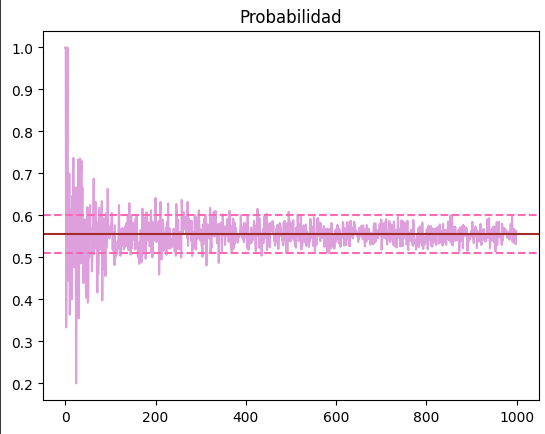

**PASO 10**. Halle el intervalo de confianza de la probabilidad de que haya interferencia con un nivel de confianza del $95 \%$.

In [208]:
import math
#Ocuparemos todo lo obtenido de la solución analítica
p_hat = 5/9
n = 800 # Este valor se toma de la grafica, es el punto en el que las fluctuaciones empiezan a cesar, es decir, cuando notemos que se estabiliza

# Cálculo del intervalo de confianza al 95%
z = 1.96  # z para 95%
margen_error = z * math.sqrt((p_hat * (1 - p_hat)) / n)

# Intervalo de confianza para la uniforme
inferior = p_hat - margen_error
superior = p_hat + margen_error

print(f"El intervalo de confianza del 95% es: ({inferior:.4f}, {superior:.4f})")

El intervalo de confianza del 95% es: (0.5211, 0.5900)


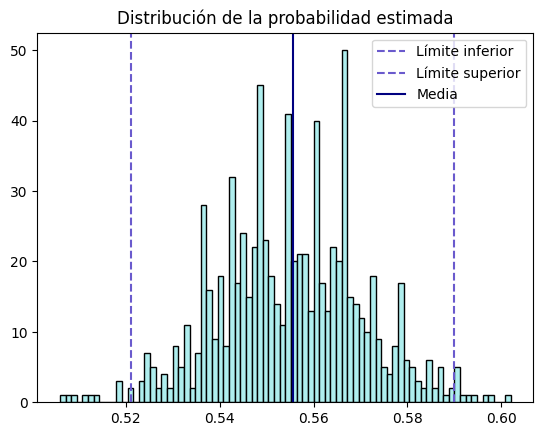

In [209]:
# Histograma definido en el rango del intervalo de confianza
plt.hist(simulacion, bins=80, color="paleturquoise", edgecolor="black")
plt.axvline(inferior, color='slateblue', linestyle='--', label='Límite inferior')
plt.axvline(superior, color='slateblue', linestyle='--', label='Límite superior')
plt.axvline(p_hat, color='navy', linestyle='-', label='Media')
plt.title('Distribución de la probabilidad estimada')
plt.legend()
plt.show()